In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
crime = pd.read_csv("C:\\Data science\\Data sets\\Clustering\\crime_data.csv")
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#Normalization function defining

def normfun(i):
    x = (i-i.min()/i.max()-i.min()) 
    return(x)

norm_data = normfun(crime.iloc[:,1:])
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,12.354023,190.866469,25.648352,13.741304
1,9.154023,217.866469,15.648352,37.041304
2,7.254023,248.866469,47.648352,23.541304
3,7.954023,144.866469,17.648352,12.041304
4,8.154023,230.866469,58.648352,33.141304


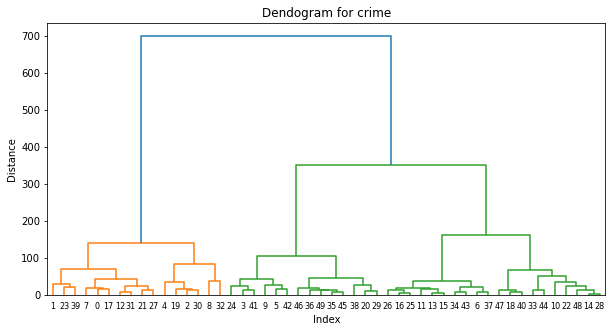

In [4]:
from scipy.cluster.hierarchy import linkage

import scipy.cluster.hierarchy as sch

#linkage , single,complete,ward,average


#p = np.array(norm_data)
#soft = linkage(norm_data,method="single",metric="euclidean")
#plt.figure(figsize=(10,5));plt.title("Dendogram for crime");plt.xlabel("Index");plt.ylabel("Distance");
#sch.dendrogram(soft,leaf_rotation=0.,leaf_font_size=8.,)
#plt.show()

#soft = linkage(norm_data,method="complete",metric="euclidean")
#plt.figure(figsize=(10,5));plt.title("Dendogram for crime");plt.xlabel("Index");plt.ylabel("Distance");
#sch.dendrogram(soft,leaf_rotation=0.,leaf_font_size=8.,)
#plt.show()

soft = linkage(norm_data,method="ward",metric="euclidean")
plt.figure(figsize=(10,5));plt.title("Dendogram for crime");plt.xlabel("Index");plt.ylabel("Distance");
sch.dendrogram(soft,leaf_rotation=0.,leaf_font_size=8.,)
plt.show()

#soft = linkage(norm_data,method="average",metric="euclidean")
#plt.figure(figsize=(10,5));plt.title("Dendogram for crime");plt.xlabel("Index");plt.ylabel("Distance");
#sch.dendrogram(soft,leaf_rotation=0.,leaf_font_size=8.,)
#plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering 

#ag = AgglomerativeClustering(n_clusters =3 , linkage = 'single', affinity = 'euclidean').fit(norm_data)
#ag = AgglomerativeClustering(n_clusters =3 , linkage = 'complete', affinity = 'euclidean').fit(norm_data)
#ag = AgglomerativeClustering(n_clusters =3 , linkage = 'average', affinity = 'euclidean').fit(norm_data)
ag = AgglomerativeClustering(n_clusters =3 , linkage = 'ward', affinity = 'euclidean').fit(norm_data)

cluster_labels=pd.Series(ag.labels_)
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

# getting aggregate mean of each cluster
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857


In [7]:
################################ Kmeans _ HARD CLUSTER
##
#crime.head()
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,12.354023,190.866469,25.648352,13.741304
1,9.154023,217.866469,15.648352,37.041304
2,7.254023,248.866469,47.648352,23.541304
3,7.954023,144.866469,17.648352,12.041304
4,8.154023,230.866469,58.648352,33.141304


In [8]:
#scatter plots 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(norm_data)
scaled_data = scaler.transform(norm_data)
scaled_data #------ was created as array values for pca function

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
#Creating two diemtional data for scatter plots 
from sklearn.decomposition import PCA
#created compononts as per the dimention you want 
pca = PCA(n_components = 2)
pca.fit(scaled_data)
crime_pca = pca.transform(scaled_data)
crime_pca.shape ## two dimention data

(50, 2)

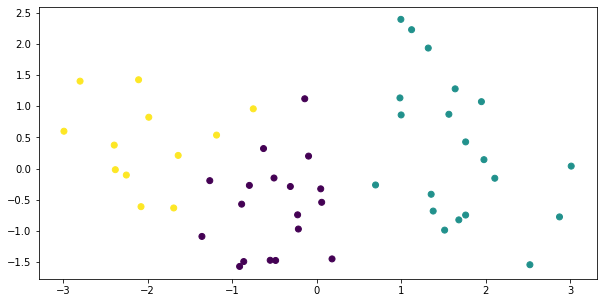

In [10]:
#creating model
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
model = KMeans(n_clusters =3).fit(crime_pca)
plt.figure(figsize=(10,5))
plt.scatter(x=crime_pca[:,0],y=crime_pca[:,1],c=model.labels_)
plt.show()

In [11]:
k = list(range(2,10))
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,12.354023,190.866469,25.648352,13.741304
1,9.154023,217.866469,15.648352,37.041304
2,7.254023,248.866469,47.648352,23.541304
3,7.954023,144.866469,17.648352,12.041304
4,8.154023,230.866469,58.648352,33.141304


([<matplotlib.axis.XTick at 0x1a68fe86310>,
 <a list of 8 Text major ticklabel objects>)

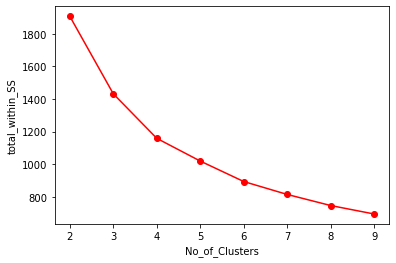

In [12]:
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(norm_data)
    
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(norm_data.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
    #scree plots 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [13]:
model1 = KMeans(n_clusters = 3)
model1.fit(norm_data)
model1.labels_ # Model cluster in array

array([0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1])

In [19]:
model_data= pd.Series(model1.labels_)
crime["clust2"] = model_data
norm_data.head()

crime.iloc[:,1:7].groupby(crime.clust2).mean()

,Murder,Assault,UrbanPop,Rape,clust2
clust2,,,,,
0,11.812500,272.562500,68.312500,28.375000,0
1,8.214286,173.285714,70.642857,22.842857,1
2,4.270000,87.550000,59.750000,14.390000,2
